
<span style="font-family: 'Montserrat'; font-weight: bold;">OBJECTIVE - To Predict the 'PRICE' of the used bikes based on different features</span>

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load the dataset from the specified file path
df = pd.read_csv('data.csv')
# The first five rows of the dataset
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [5]:
# Number of rows and columns in the dataset  
print(df.shape  )
# A summary of the dataset, including column data types and missing values  
df.info()

(32648, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
# Statistical summary for numerical columns, including count, mean, std, min, and percentiles  
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
# The total number of missing values in each column  
df.isna().sum()
# No null values in our dataset

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [8]:
# Remove the 'bike_name' column from the dataset as it may not be needed for analysis  
df.drop('bike_name', axis=1, inplace=True)  

In [9]:
# Create a copy of the original dataset to preserve the raw data  
df_new = df.copy()  

In [10]:
# The occurrences of each brand in the dataset  
df.brand.value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: count, dtype: int64

In [11]:
# Select brands with fewer than 1000 occurrences in the dataset  
x = df_new['brand'].value_counts().loc[lambda x: x < 1000]  
# Replace less common brands (appearing fewer than 1000 times) with 'Others'
df_new['brand'] = df_new['brand'].replace(x.index, 'Others')

In [12]:
# The updated count of each brand after replacing less common brands with 'Others'
df_new.brand.value_counts()

brand
Bajaj            11213
Hero              6368
Royal Enfield     4178
Yamaha            3916
Honda             2108
Suzuki            1464
TVS               1247
Others            1077
KTM               1077
Name: count, dtype: int64

In [13]:
# The occurrences of each city in the dataset  
df_new['city'].value_counts()

city
Delhi         7318
Bangalore     2723
Mumbai        2591
Hyderabad     2160
Pune          1724
              ... 
Berhampore       1
Silvasa          1
Hospet           1
Palai            1
Sidhi            1
Name: count, Length: 443, dtype: int64

In [14]:
# Select cities with fewer than 500 occurrences in the dataset
x = df_new['city'].value_counts().loc[lambda x: x < 500]
# Replace less common cities (appearing fewer than 500 times) with 'Others'
df_new['city'] = df_new['city'].replace(x.index, 'Others')


In [15]:
# The updated count of each brand after replacing less common brands with 'Others'  
df_new.city.value_counts()

city
Delhi                  7318
Bangalore              2723
Mumbai                 2591
Hyderabad              2160
Others                 2098
Pune                   1724
Chennai                1619
Lucknow                1294
Jaipur                 1007
Ghaziabad               938
Ahmedabad               905
Noida                   776
Bhopal                  651
Gautam Buddha Nagar     649
Kanchipuram             640
Jodhpur                 635
Karnal                  625
Allahabad               621
Rupnagar                621
Gurgaon                 617
Godhara                 611
Faridabad               609
Kadapa                  608
Perumbavoor             608
Name: count, dtype: int64

In [16]:
# The occurrences of each owner type in the dataset  
df_new['owner'].value_counts()

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [17]:
# Grouping multiple ownership categories into a single label for better analysis  
df_new['owner'] = df_new['owner'].replace(['Second Owner', 'Third Owner', 'Fourth Owner Or More'], 'Second Owner Or More')
# Display the updated count of each owner type  
df_new['owner'].value_counts()

owner
First Owner             29964
Second Owner Or More     2684
Name: count, dtype: int64

<span style="font-family: 'Montserrat'; font-weight: bold;">Treating Outliers</span>

In [18]:
# Number of bikes priced above the 99th percentile 
print(len(df_new[df_new['price'] > df_new['price'].quantile(0.99)]), r'(top 1% of most expensive bikes)')
# Number of bikes with power above the 99th percentile 
print(len(df_new[df_new['power'] > df_new['power'].quantile(0.99)]), r'(top 1% most powerful bikes)')
# Number of bikes with kilometers driven above the 99th percentile 
print(len(df_new[df_new['kms_driven'] > df_new['kms_driven'].quantile(0.99)]), r'(top 1% of bikes with the highest kilometers driven)')
# Number of bikes with age above the 99th percentile 
print(len(df_new[df_new['age'] > df_new['age'].quantile(0.99)]), r'(top 1% of oldest bikes)')

# Since the no. of datapoints above 99% quantile is few in number, therefore we can drop them

# Remove outliers by filtering out the top 1% (99th percentile) for price, power, kms_driven, and age  
df_new = df_new[-(df_new.price > df_new.price.quantile(0.99))]
df_new = df_new[-(df_new.power > df_new.power.quantile(0.99))]
df_new = df_new[-(df_new.kms_driven > df_new.kms_driven.quantile(0.99))]
df_new = df_new[-(df_new.age > df_new.age.quantile(0.99))]

print('Total number of dropped rows is : ',len(df) - len(df_new))

177 (top 1% of most expensive bikes)
131 (top 1% most powerful bikes)
127 (top 1% of bikes with the highest kilometers driven)
46 (top 1% of oldest bikes)
Total number of dropped rows is :  356


<span style="font-family: 'Montserrat'; font-weight: bold;">EDA - (Exploratory Data Analysis)</span>

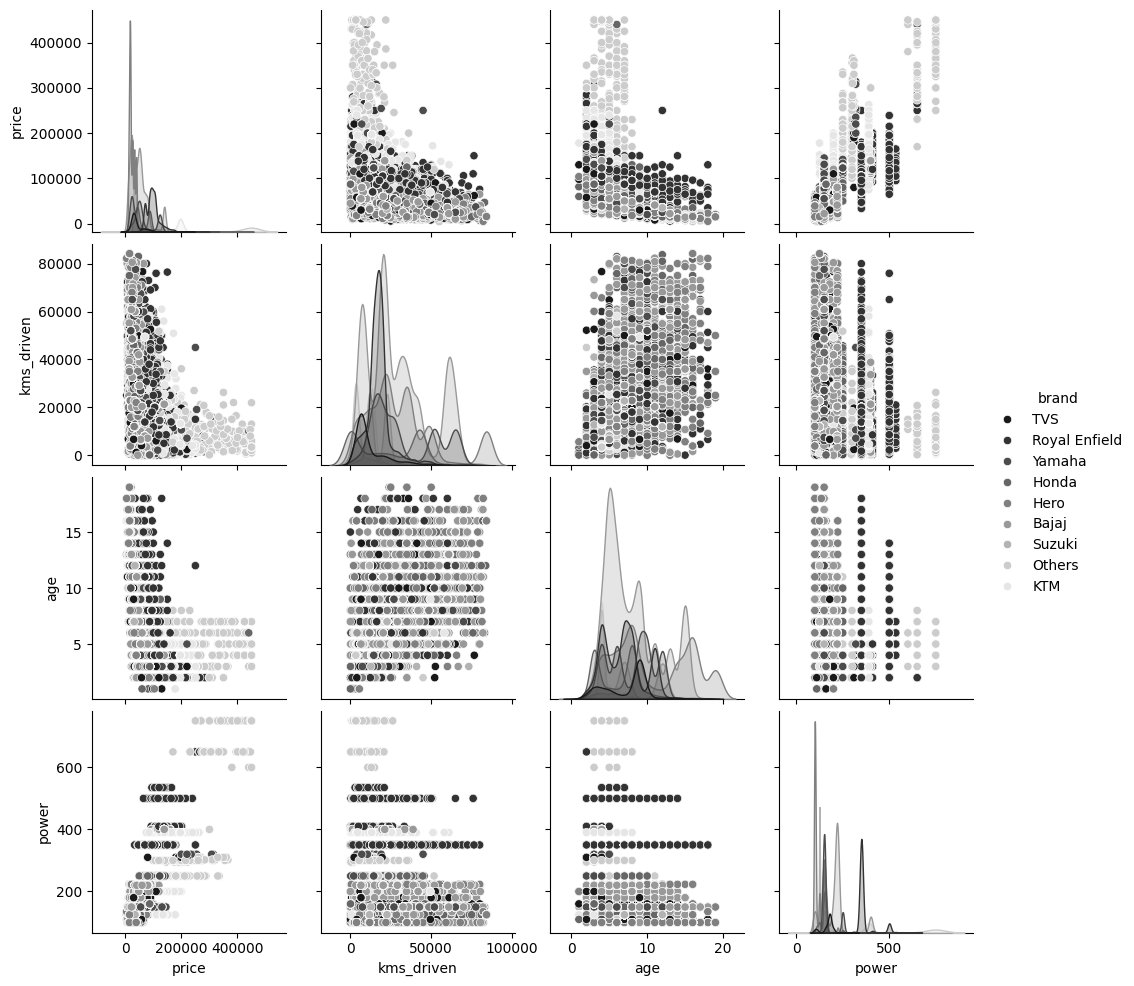

In [19]:
# Create a pairplot to visualize relationships between numerical variables  
sns.pairplot(df_new, hue='brand', palette="gray")
# From the pairplot we can conclude that there is some positive relation between price and power , and a negative relation between price and age, and price and kms_driven

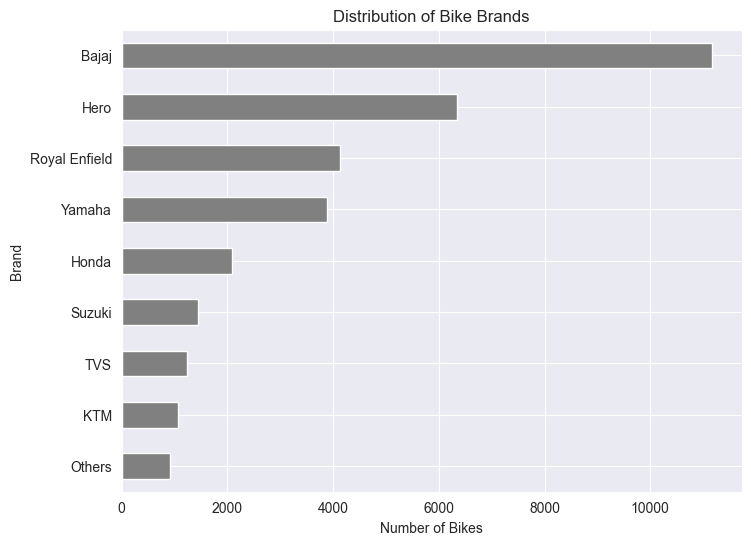

In [20]:
# A horizontal bar chart of brand counts, sorted by frequency  
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
df_new['brand'].value_counts().sort_values().plot(kind="barh", color='grey')
plt.xlabel("Number of Bikes")
plt.ylabel("Brand")
plt.title("Distribution of Bike Brands")
plt.show()

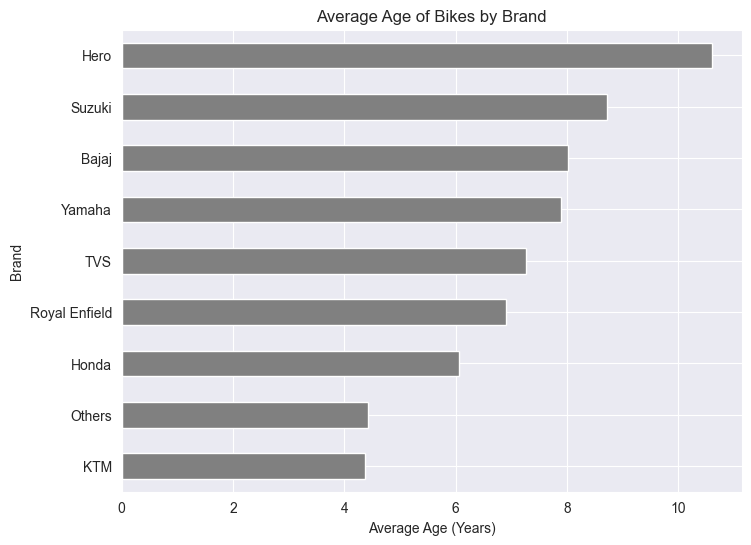

In [21]:
# A horizontal bar chart of the average age of bikes for each brand, sorted  
plt.figure(figsize=(8,6))
df_new.groupby('brand')['age'].mean().sort_values().plot(kind="barh", color='grey')
plt.xlabel("Average Age (Years)")
plt.ylabel("Brand")
plt.title("Average Age of Bikes by Brand")
plt.show()

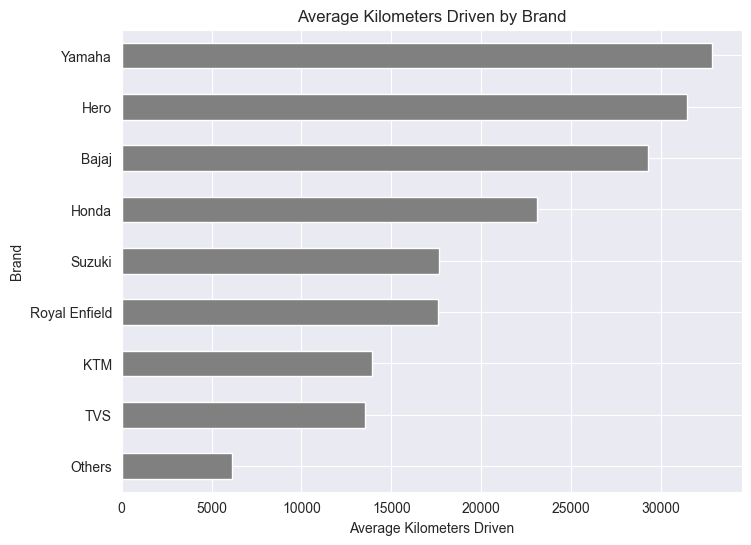

In [22]:
# A horizontal bar chart of the average kilometers driven for each brand, sorted
plt.figure(figsize=(8,6))
df_new.groupby('brand')['kms_driven'].mean().sort_values().plot(kind="barh", color='grey')
plt.xlabel("Average Kilometers Driven")
plt.ylabel("Brand")
plt.title("Average Kilometers Driven by Brand")
plt.show()

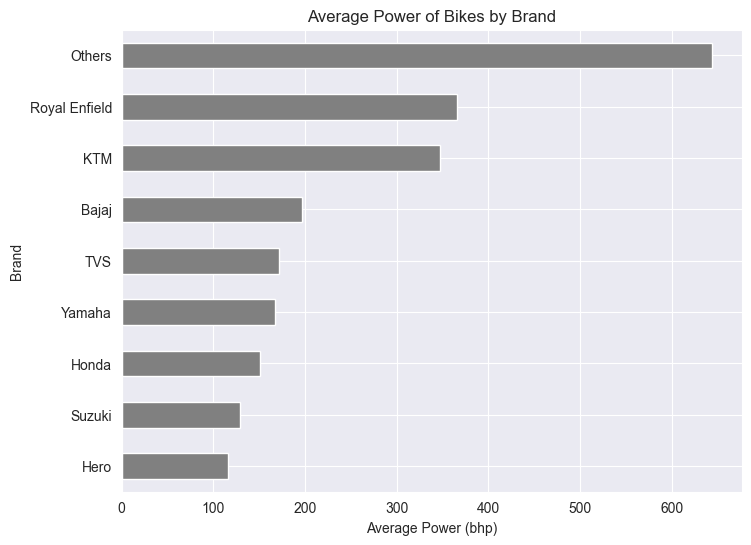

In [23]:
# A horizontal bar chart of the average power (bhp) for each brand, sorted  
plt.figure(figsize=(8,6))
df_new.groupby('brand')['power'].mean().sort_values().plot(kind="barh", color='grey')
plt.xlabel("Average Power (bhp)")
plt.ylabel("Brand")
plt.title("Average Power of Bikes by Brand")
plt.show()


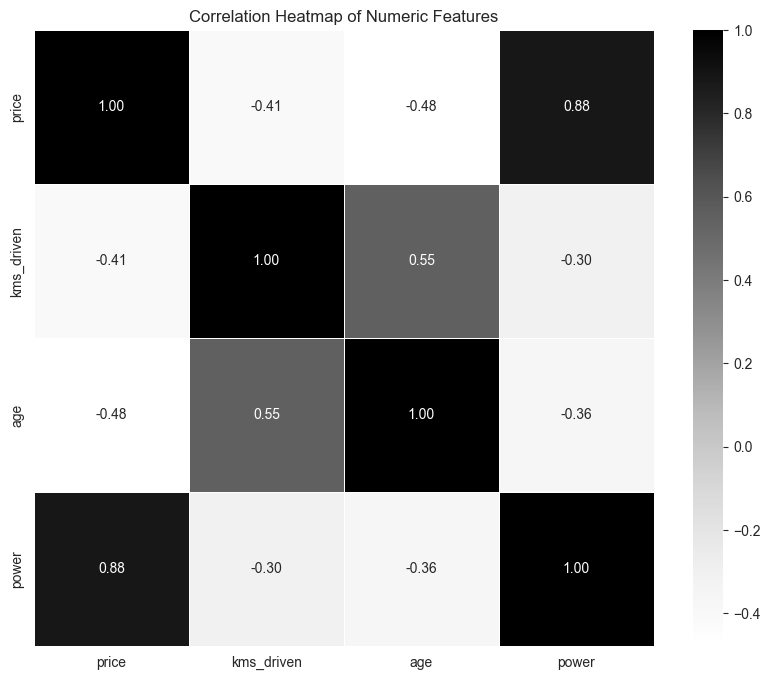

In [24]:
#  A heatmap showing the correlation between numerical features
numeric_df = df_new.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greys", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
# From the heatmap it can be easily concluded that Power and Price are highly positively correlated

<span style="font-family: 'Montserrat'; font-weight: bold;">Converting Categorical Variables into Integers</span>

In [140]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Categorical columns (object dtype)
categorical_cols = df_new.select_dtypes(include=['object']).columns  

# Applying Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_new[col] = le.fit_transform(df_new[col])

# First few rows of transformed data
df_new.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,0,17654.0,0,3.0,110.0,7
1,119900.0,5,11000.0,0,4.0,350.0,5
3,65000.0,2,16329.0,0,4.0,180.0,7
4,80000.0,2,10000.0,0,3.0,150.0,8
5,53499.0,5,25000.0,0,6.0,150.0,8


In [86]:
# Importing train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separating the target variable (price) from the features
X = df_new.drop('price', axis=1)  # Features (independent variables)
y = df_new.price  # Target variable (dependent variable)

# Splitting the data into 70% training and 30% testing, ensuring reproducibility with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the shape of the feature set (X) and the target variable (y)
X.shape, y.shape  # (number of rows, number of columns)

((32292, 6), (32292,))

<span style="font-family: 'Montserrat'; font-weight: bold;"> Linear Regression Model</span>

In [87]:
# Importing the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression  
# Importing metrics to evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score  

# Creating an instance of the LinearRegression model
lr = LinearRegression()  

# Fitting the model to the training data (Fixed the issue)
lr.fit(X_train, y_train)  

# Getting the R² score of the model on test data
r2 = lr.score(X_test, y_test)  
print("R² Score on Test Data:", r2)

# Making predictions on the test set
y_pred = lr.predict(X_test)  

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)  
print('The Mean Squared Error is:', mse)  

# Calculating Root Mean Squared Error (RMSE) for better interpretability
rmse = np.sqrt(mse)
print('The Root Mean Squared Error is:', rmse)  

# Calculating R² Score using r2_score function
r2_calculated = r2_score(y_test, y_pred)  
print('The R² Score (calculated) is:', r2_calculated)  

R² Score on Test Data: 0.8288911795888292
The Mean Squared Error is: 889439855.4824758
The Root Mean Squared Error is: 29823.47825929222
The R² Score (calculated) is: 0.8288911795888292


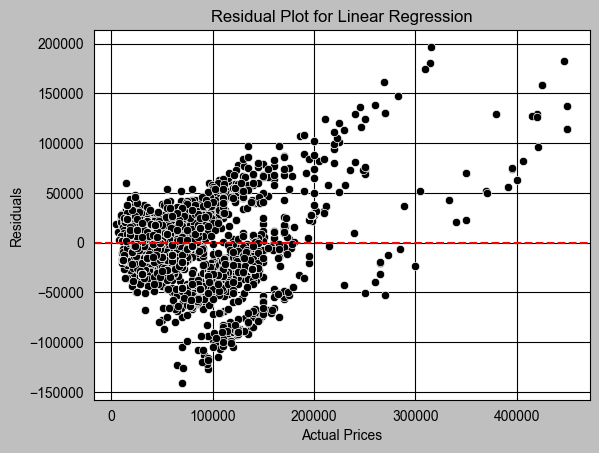

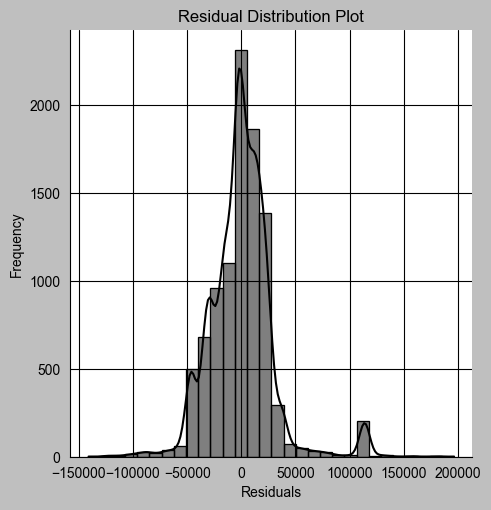

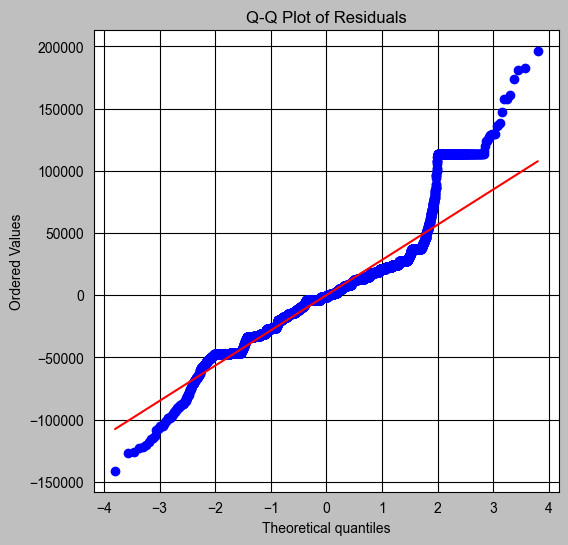

Final R² Score for Linear Regression: 0.8288911795888292


In [88]:
# Visualizing residuals (difference between actual and predicted values)
residual = y_test - y_pred  
plt.style.use('grayscale')
sns.scatterplot(x=y_test, y=residual)  # Scatter plot of residuals
plt.axhline(y=0, c='r', ls='--')  # Adding a horizontal line at y=0 for reference
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

# Visualizing the distribution of residuals
sns.displot(residual, bins=30, kde=True)  # Histogram with KDE for residuals
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()

# Importing SciPy for probability plot (Q-Q plot)
import scipy.stats as stats  

# Creating a Q-Q plot to check normality of residuals
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
stats.probplot(residual, plot=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Calculating R² score for linear regression model
r2_lr = r2_score(y_test, y_pred)  
print("Final R² Score for Linear Regression:", r2_lr)

<span style="font-family: 'Montserrat'; font-weight: bold;"> Polynomial Regression Model</span>

In [89]:
# Import the necessary library for polynomial feature transformation
from sklearn.preprocessing import PolynomialFeatures 

# Convert the original features into polynomial features (degree=2)
# This helps capture non-linear relationships in the data
poly_conv = PolynomialFeatures(degree=2, include_bias=False)  

# Transform the dataset to include polynomial features
poly_feat = poly_conv.fit_transform(X)  

# Split the dataset into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  

# Train the model using polynomial features
lr.fit(X_train, y_train)  

# Make predictions on the test data
y_pred = lr.predict(X_test)  

# Import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score  

# Calculate Mean Squared Error (MSE) - measures average squared difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared error is : ', mse)

# Calculate Root Mean Squared Error (RMSE) - provides error in actual units of target variable
print('The Root Mean Squared error is : ', np.sqrt(mse))

# Calculate R² Score - indicates how well the model explains the variance in the data (closer to 1 is better)
print('The R2 Score is : ', r2_score(y_test, y_pred))

The Mean Squared error is :  292801176.7732888
The Root Mean Squared error is :  17111.434094583914
The R2 Score is :  0.9436714425783147


<span style="font-family: 'Montserrat'; font-weight: medium;"> HYPERPARAMETER TUNING</span>

In [90]:
# Lists to store RMSE errors for different polynomial degrees
train_rmse_error = []
test_rmse_error = []

# Loop through polynomial degrees from 1 to 5
for d in range(1, 6):
    # Create polynomial features up to the given degree
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)  # Transform input features
    
    # Split the dataset into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)
    
    # Initialize and train a Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Make predictions on both training and test sets
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)
    
    # Compute RMSE (Root Mean Squared Error) for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # Store the RMSE values for analysis
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [91]:
train_rmse_error , test_rmse_error
# train: This list stores the Root Mean Squared Error (RMSE) values for the training set across different polynomial degrees. 
# A lower RMSE here means the model is fitting the training data well.

# test_rmse_error: This list stores the RMSE values for the test set, indicating how well the model generalizes to unseen data. 
# If the test RMSE is significantly higher than the train RMSE, it may indicate overfitting.

([np.float64(30029.618163935655),
  np.float64(17910.069177790952),
  np.float64(17412.911422986403),
  np.float64(21652.174837385424),
  np.float64(30981.37680472891)],
 [np.float64(29823.47825929222),
  np.float64(17111.434094583914),
  np.float64(16556.983159876654),
  np.float64(20602.426805799252),
  np.float64(30428.047956660055)])

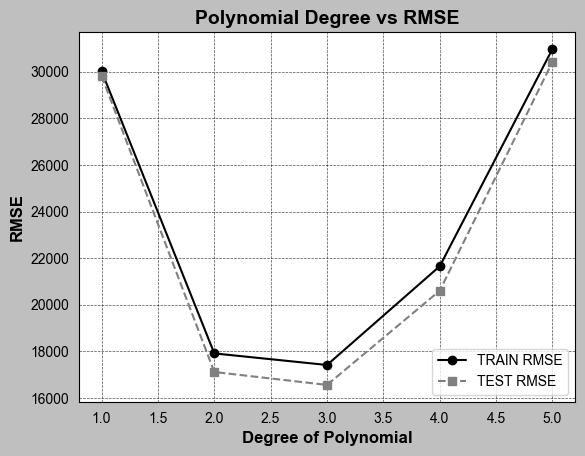

In [92]:
plt.style.use('grayscale')  
plt.plot(range(1,6), train_rmse_error[:5], linestyle='-', marker='o', color='black', label="TRAIN RMSE")
plt.plot(range(1,6), test_rmse_error[:5], linestyle='--', marker='s', color='gray', label="TEST RMSE")
plt.xlabel('Degree of Polynomial', fontsize=12, fontweight='bold')
plt.ylabel('RMSE', fontsize=12, fontweight='bold')
plt.title('Polynomial Degree vs RMSE', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  
plt.show()

# From the chart we infer the relationship between the degree of the polynomial and the Root Mean Squared Error (RMSE) for both the training and testing datasets.

In [93]:
# Converting features into polynomial features of degree 4 (removing bias term)
final_poly_conv = PolynomialFeatures(degree=4, include_bias=False)
final_poly_feat = final_poly_conv.fit_transform(X)  # Apply transformation

# Spliting dataset into training and testing sets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(final_poly_feat, y, test_size=0.3, random_state=42)

# Training a linear regression model on the polynomial features
final_lr = LinearRegression()
final_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = final_lr.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared Error is:', mse)
print('The Root Mean Squared Error is:', np.sqrt(mse))
print('The R2 Score is:', r2_score(y_test, y_pred))

The Mean Squared Error is: 424459990.2883156
The Root Mean Squared Error is: 20602.426805799252
The R2 Score is: 0.9183431596838291


<span style="font-family: 'Montserrat'; font-weight: medium;"> FEATURE SCALING</span>

In [ ]:
# Importing the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler to scale the features
scaler = StandardScaler()

# Fitting the scaler to the training data (scaling parameters based on training set)
scaler.fit(X_train)

# Transforming both training and test data using the fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating a new instance of the Linear Regression model
final_lr = LinearRegression()

# Training the linear regression model using the scaled training data
final_lr.fit(X_train, y_train)

# Making predictions on the scaled test set
y_pred = final_lr.predict(X_test)

# Calculating the Mean Squared Error (MSE) between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared Error is:', mse)

# Calculating the Root Mean Squared Error (RMSE) for better interpretability
rmse = np.sqrt(mse)
print('The Root Mean Squared Error is:', rmse)

# Calculating the R² Score (coefficient of determination) for the test data
r2_score_value = r2_score(y_test, y_pred)
print('The R² Score is:', r2_score_value)

# Storing the R² score in a variable for further use if needed
r2_pr = r2_score_value

The Mean Squared Error is: 134113558.44558461
The Root Mean Squared Error is: 11580.740841828065
The R² Score is: 0.974199477743978


<span style="font-family: 'Montserrat'; font-weight: bold;"> KNN Regression Model</span>

<span style="font-family: 'Montserrat'; font-weight: medium;"> FEATURE SCALING</span>

In [96]:
# Importing the KNeighborsRegressor for scaling KNN
from sklearn.neighbors import KNeighborsRegressor

# Splitting data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing StandardScaler for feature scaling (important for KNN)
scaler = StandardScaler()

# Scaling the training and test data (to bring all features to the same scale)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)  # Note: Don't fit_transform on test data, only transform

# Initializing a list to store the error rate for each K value
error_rate = []

# Looping through K values from 1 to 40 to find the optimal K based on error rate
for i in range(1, 40):
    knr = KNeighborsRegressor(n_neighbors=i)  # Creating KNN regressor with K=i
    knr.fit(scaled_X_train, y_train)  # Training the model
    pred_i = knr.predict(scaled_X_test)  # Predicting on test data
    
    # Calculating mean squared error for each K value and appending to error_rate
    error_rate.append(mean_squared_error(y_test, pred_i))

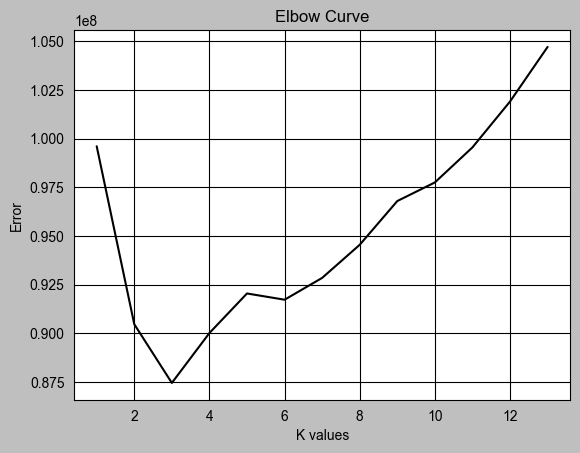

In [97]:
# Plotting the elbow curve to visually determine the optimal K value
plt.plot(range(1, 14), error_rate[:13])  # Limiting to the first 13 points for a clearer plot
plt.title('Elbow Curve')
plt.xlabel('K values')
plt.ylabel('Error')
plt.show() 

In [98]:
# We will select the lowest value, i.e., K=5, as our optimal K.
knr = KNeighborsRegressor(n_neighbors=5)  # Creating KNN regressor with K=5
knr.fit(scaled_X_train, y_train)  # Training the model with optimal K

# Making predictions on the test data
y_pred = knr.predict(scaled_X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
print('The Mean Squared Error is:', mse)

# Calculating and printing the Root Mean Squared Error (RMSE) for better interpretability
rmse = np.sqrt(mse)
print('The Root Mean Squared Error is:', rmse)

# Calculating R² Score for KNN model to see the proportion of variance explained
r2 = r2_score(y_test, y_pred)
print('The R² Score is:', r2)

# Storing the R² score for potential further use
r2_knr = r2

The Mean Squared Error is: 92049531.96248968
The Root Mean Squared Error is: 9594.244731217235
The R² Score is: 0.9822916785925248


<span style="font-family: 'Montserrat'; font-weight: bold;">Decision Tree Regressor Model</span>

In [99]:
# Importing the necessary library for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Initializing an empty list to store the R² scores for different max_depth values
r2 = []

# Looping through different values of max_depth (1 to 20)
for i in range(1, 21):
    # Creating a Decision Tree Regressor model with a specific max_depth (i)
    dtree = DecisionTreeRegressor(max_depth=i)
    
    # Fitting the model on the training data
    dtree.fit(X_train, y_train)
    
    # Predicting the target variable using the test data
    y_pred = dtree.predict(X_test)
    
    # Appending the R² score (calculated for each max_depth) to the r2 list
    r2.append(r2_score(y_test, y_pred))

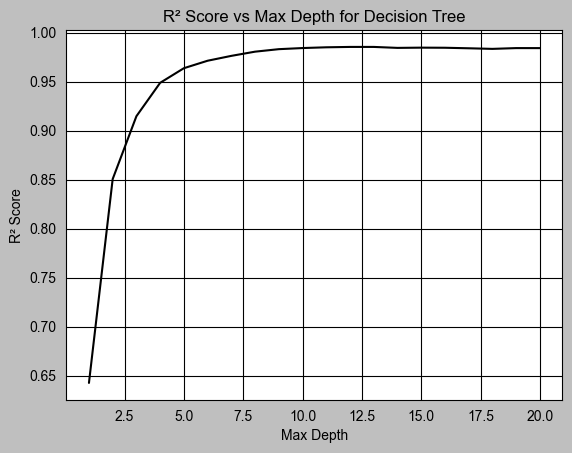

In [100]:
# Finding the max R² score and the corresponding max_depth value using Elbow Curve
plt.plot(range(1, 21), r2) 
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('R² Score vs Max Depth for Decision Tree')
plt.show()

In [101]:
# Create DataFrame with max_depth values as index and corresponding R² scores
dff = pd.DataFrame(index=range(1, len(r2)+1), data=r2, columns=['R2 Score'])

# Sorting the DataFrame by R² score in descending order to find the highest scores
sorted_dff = dff.sort_values(ascending=False, by='R2 Score')

# Display top 5 values (max R² score and corresponding max_depth values)
print(sorted_dff.head())

    R2 Score
13  0.985348
12  0.985344
11  0.984964
15  0.984606
16  0.984502


In [102]:
print('Therefore Max R2 score is {} at Max_depth {}'.format(round(max(dff['R2 Score']), 4), dff['R2 Score'].idxmax()))

Therefore Max R2 score is 0.9853 at Max_depth 13


In [103]:
# Retraining the Decision Tree model with the optimal max_depth (12)
dtree = DecisionTreeRegressor(max_depth=12)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the model on the training data
dtree.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dtree.predict(X_test)

# Calculating Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score
mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared error is : ', mse)

# Calculating and printing the Root Mean Squared Error (RMSE) for better interpretability
rmse = np.sqrt(mse)
print('The Root Mean Squared error is : ', rmse)

# Calculating R² Score for Decision Tree Regressor model
r2 = r2_score(y_test, y_pred)
print('The R2 Score is : ', r2)

# Storing the R² score in a variable for further use if needed
r2_dtr = r2

The Mean Squared error is :  73992517.06282197
The Root Mean Squared error is :  8601.890319157876
The R2 Score is :  0.9857654542509734


<span style="font-family: 'Montserrat'; font-weight: bold;">Model Comparison</span>

In [104]:
print('R2 score of Linear Regression is :', r2_lr)
print('R2 score of Polynomial Regression is :', r2_pr)
print('R2 score of KNN Regressor is :', r2_knr)
print('R2 score of Decision Tree Regressor is :', r2_dtr)

R2 score of Linear Regression is : 0.8288911795888292
R2 score of Polynomial Regression is : 0.974199477743978
R2 score of KNN Regressor is : 0.9822916785925248
R2 score of Decision Tree Regressor is : 0.9857654542509734


In [105]:
dict = {'Linear Regression' : r2_lr,
        'Polynomial Regression' : r2_pr,
        'KNN Regressor':r2_knr,
        'Decision Tree Regressor':r2_dtr}
dff = pd.DataFrame(index= dict.keys(), data = dict.values(), columns=['R2 Scores'])
print(dff)

                         R2 Scores
Linear Regression         0.828891
Polynomial Regression     0.974199
KNN Regressor             0.982292
Decision Tree Regressor   0.985765


In [106]:
print(dff['R2 Scores'].idxmax(), dff['R2 Scores'].max())

Decision Tree Regressor 0.9857654542509734


In [107]:
print(f'Henceforth, the best machine learning model is "{dff['R2 Scores'].idxmax()}" with an R2 score of "{round(dff['R2 Scores'].max(), 3)}"')
# The best model is the Decision Tree Regressor with max_depth = 12 and an R² score of 0.98

Henceforth, the best machine learning model is "Decision Tree Regressor" with an R2 score of "0.986"


In [ ]:
import joblib

# Ensure model is trained before saving
dtree = DecisionTreeRegressor(max_depth=12)
dtree.fit(X_train, y_train)  # Ensure X_train, y_train are defined

# Save the trained model
joblib.dump(dtree, 'bike_price_model.pkl')

# Save the scaler (if used)
joblib.dump(scaler, 'scaler.pkl')  # Make sure 'scaler' exists

['scaler.pkl']

In [114]:

# Load the encoder (if saved)
encoder = joblib.load('scaler.pkl')  # Replace with actual encoder filename if saved

# Get the mapping of brand names to numbers
brand_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Brand Encoding Mapping:")
print(brand_mapping)


AttributeError: 'StandardScaler' object has no attribute 'classes_'

In [122]:
print(df_new[['brand']].drop_duplicates().sort_values(by='brand'))

brand_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Brand Encoding Mapping:", brand_mapping)


    brand
12      0
7       1
6       2
33      3
18      4
1       5
17      6
0       7
4       8


AttributeError: 'LabelEncoder' object has no attribute 'classes_'